# Importing libraries


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (8,6)

# Reading data

In [5]:
df = pd.read_csv("auto.csv", header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning and Processing

### Dealing with missing values
Upon extensive examination of the data, it becomes evident that there are numerous missing values denoted by '?' entries, particularly notable in the `normalized-losses` column. The `price` column also presents challenges with some entries marked as '?'. This poses a significant issue as we aim to predict car prices based on specific features, and tuples with absent `price` values hinder our ability to construct an effective model for this task.

### Converting '?' to NaN

In [6]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Replacing missing values
Summary of the significant missing data:
<ul>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ul>

In [7]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

We have some freedom in choosing how to deal with data, the most common ways are:
<ol>
<li>Drop data (row or column)</li>
<li>Replace data with mean/median</li>
<li>Replace data with mode</li>
</ol>

We shall be using the following methodologies in the columns listed below:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>We are replacing missing data in "num-of-doors" with the most common value i.e. "four". This is because if we had to guess the number of doors in a car, basde on this dataset the guess of four is most likely to be correct.</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [11]:
def replaceWithMean(df):
    avg_val = df.astype("float").mean(axis=0)
    df.replace(np.nan, avg_val, inplace=True)

replaceWithMean(df["normalized-losses"])
replaceWithMean(df["stroke"])
replaceWithMean(df["bore"])
replaceWithMean(df["horsepower"])
replaceWithMean(df["peak-rpm"])

df["num-of-doors"].replace(np.nan, df['num-of-doors'].mode().loc[0], inplace=True)
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Ensuring we have all non-null values now

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

### Correcting data formats

In [18]:
df.dtypes[["bore", "stroke", "price", "peak-rpm", "normalized-losses", "horsepower"]]

bore                 float64
stroke               float64
price                float64
peak-rpm             float64
normalized-losses      int32
horsepower             int32
dtype: object

In [19]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df[["normalized-losses", "horsepower"]] = df[["normalized-losses", "horsepower"]].astype("int")
df.dtypes[["bore", "stroke", "price", "peak-rpm", "normalized-losses", "horsepower"]]

bore                 float64
stroke               float64
price                float64
peak-rpm             float64
normalized-losses      int32
horsepower             int32
dtype: object

### Normalizing `length` and `width`

In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

# Enriching the dataset

### Binning `horsepower` into low, med and high

In [21]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [22]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

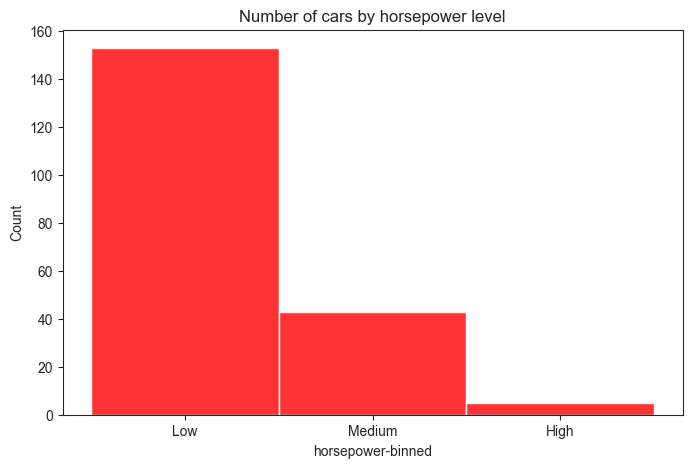

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.set_style("ticks")
sns.histplot(df["horsepower-binned"], color='r', alpha=0.8)
plt.title("Number of cars by horsepower level")
plt.show()

### Converting `aspriration` into indicator variables

The `gas` and `diesel` columns will come in handy in later stages for regression analysis.

In [ ]:
dummy_var = pd.get_dummies(df["fuel-type"])
df = pd.concat([df, dummy_var], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

# Correlation Analysis

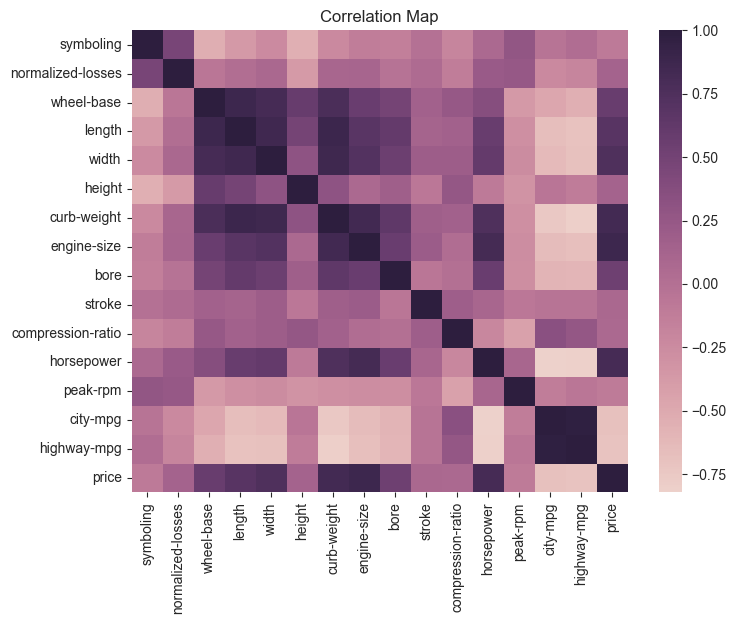

In [70]:
plt.figure(figsize=(8,6))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation Map')
# plt.xlabel('X-Axis')
# plt.ylabel('Y-Axis')
# plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
# plt.yticks(range(len(df_corr.columns)), df_corr.columns)
# plt.colorbar()
plt.show()

There is a clear <b>positive correlation</b> between `engine-size` and `price`.

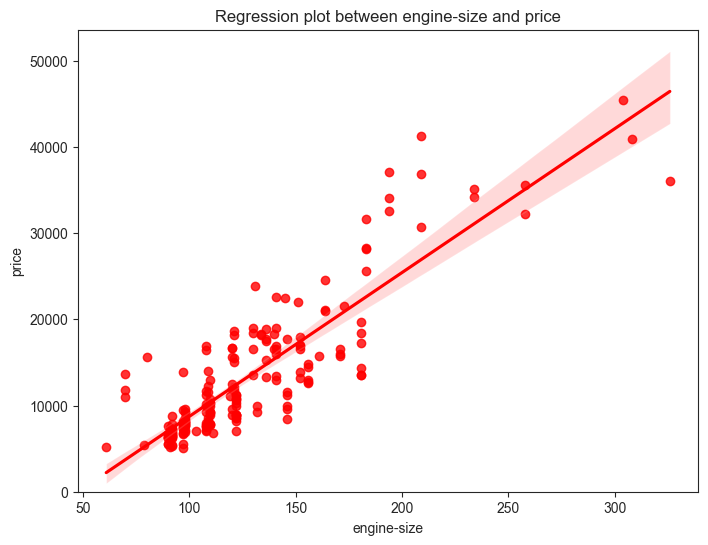

In [76]:
plt.figure(figsize=(8,6))
sns.regplot(x="engine-size", y="price", data=df, color='r')
plt.title("Regression plot between engine-size and price")
plt.ylim(0,)
plt.show()

Conversely, there is a <b>negative direct correlation</b> between `highway-mpg` and `price`.

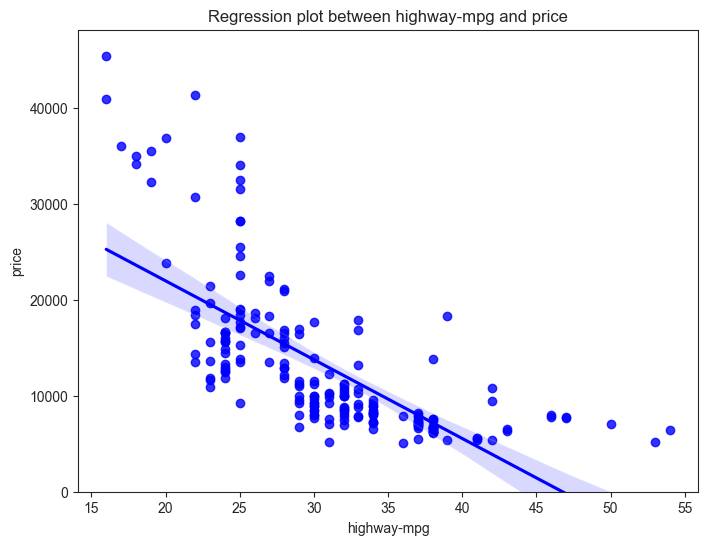

In [78]:
plt.figure(figsize=(8,6))
sns.regplot(x="highway-mpg", y="price", data=df, color='b')
plt.title("Regression plot between highway-mpg and price")
plt.ylim(0,)
plt.show()

As we shall see below, there seems to be a significant overlap between `body-style` and `price`, so it might not be a good predictor of price unlike `engine-size` and `highway-mpg` which have clear negative or positive correlations with price.

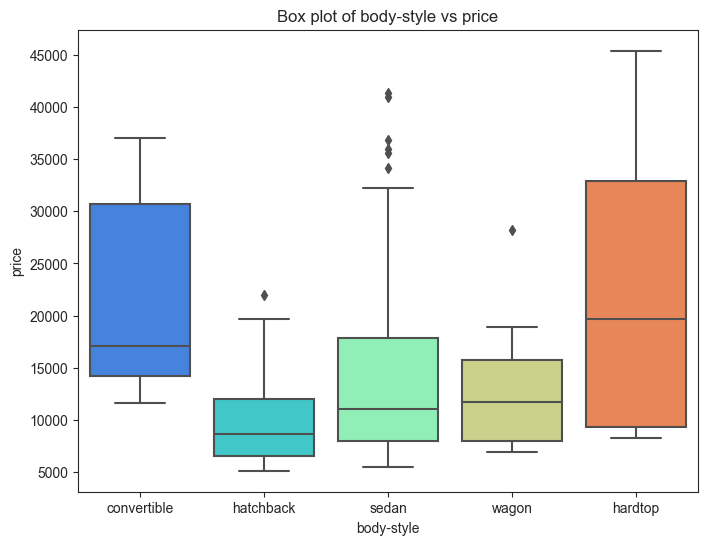

In [93]:
sns.boxplot(x="body-style", y="price", data=df, palette='rainbow')
plt.title("Box plot of body-style vs price")
plt.show()

Here we see that the distribution of price between these two `engine-location` categories, front and rear, are distinct enough to take engine-location as a potential good predictor of `price`.


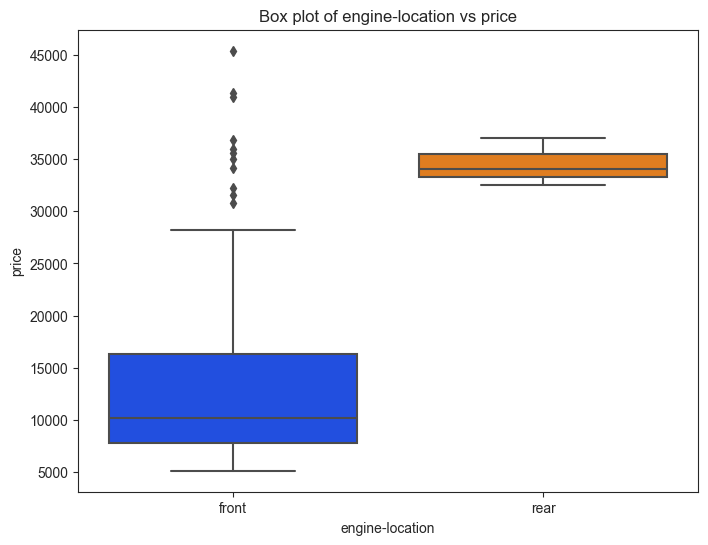

In [96]:
sns.boxplot(x="engine-location", y="price", data=df, palette='bright')
plt.title("Box plot of engine-location vs price")
plt.show()

There is a significant difference between various `drive-wheels` categories and the price distribution. We can therefore take `drive-wheels` as a potential predictor of `price`.

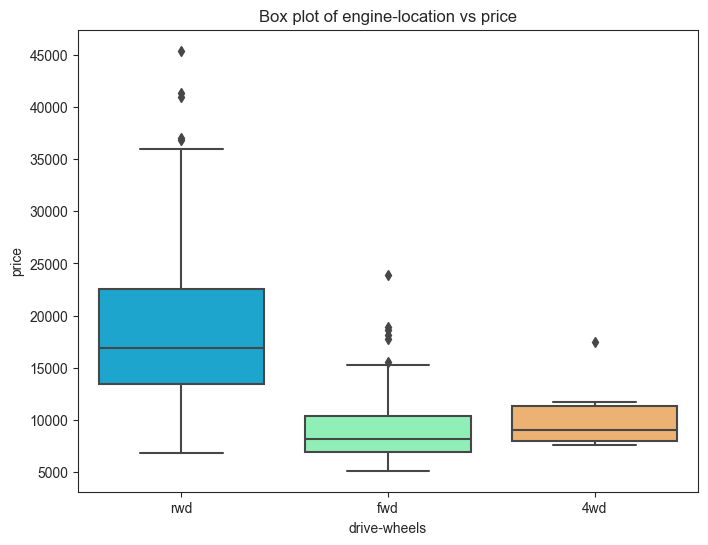

In [97]:
sns.boxplot(x="drive-wheels", y="price", data=df, palette='rainbow')
plt.title("Box plot of engine-location vs price")
plt.show()

Upon closer examination, it has been discovered that the variable `engine-location` may not serve as a reliable predictor for `price`. This is attributed to the fact that only <b>3 cars</b> have a rear engine location, potentially causing a skewed result. Consequently, we opt to exclude `engine-location` as a candidate predictor for `price`.

In [98]:
df["engine-location"].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

It is clear from this heatmap that rwd cars seem to be more pricey than other drive wheel types. Convertible rwd type cars tend to be the most expensive among the lot.

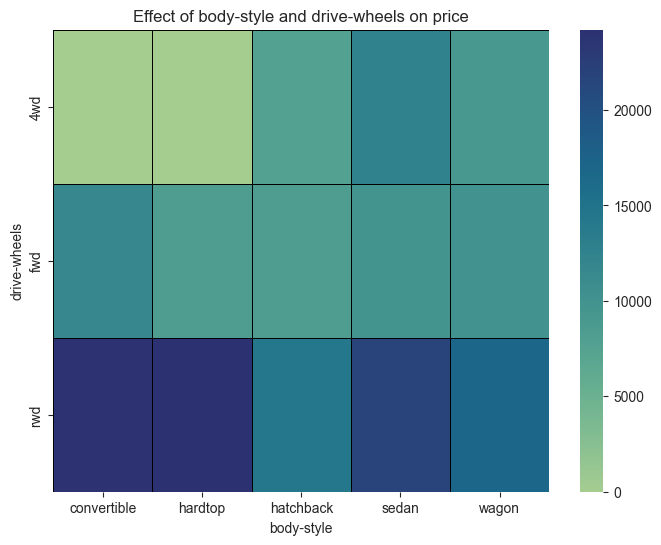

In [112]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1.sort_values('price', ascending=False).reset_index(drop=True)
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot.columns = grouped_pivot.columns.droplevel(0)
sns.heatmap(grouped_pivot, cmap='crest', linewidths=0.5, linecolor='black')
plt.title("Effect of body-style and drive-wheels on price")
plt.show()

# Statistical Significance Calculations

In [113]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [114]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650436e-48


Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [115]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158917e-30


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [116]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522676  with a P-value of P = 9.200335510480516e-38


Since the p-value is $<$ 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [117]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893972e-53


Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [118]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64


Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [119]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.04918948393533e-17


Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [120]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567512e-29


Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

# Conclusion of EDA

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>length</li>
    <li>width</li>
    <li>curb-weight</li>
    <li>engine-size</li>
    <li>horsepower</li>
    <li>city-mpg</li>
    <li>highway-mpg</li>
    <li>wheel-base</li>
    <li>bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>drive-wheels</li>
</ul>

<p>We shall now use these variables to build our Machine Learning models.</p>

# Model Development and Evaluation

## Functions for plotting

In [142]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [141]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform)
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

SyntaxError: expected ':' (1890890446.py, line 1)

## Linear Regression

### Linear regression with only `horsepower` as feature

In [124]:
from sklearn.linear_model import LinearRegression

y_data = df['price']
x_data=df.drop('price',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

number of test samples : 21
number of training samples: 180


LinearRegression()

$R^2$ value on the test data

In [125]:
lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

Mean Cross Validation Score using 4 folds:

In [127]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, verbose=1)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220592359225417 and the standard deviation is 0.291304806661184


The following is a graphical representation for the linear regression model I have trained above. As is apparent, a single variable is not necessarily a great predictpr of price, so I shall train models for multiple linear regression.

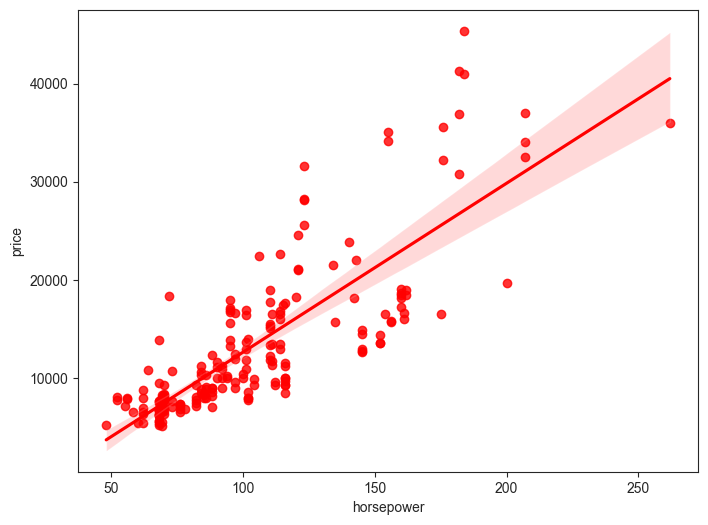

In [129]:
sns.regplot(df, x="horsepower", y="price", color='r')
plt.show()

### Multiple Linear Regression and Linear Regression with Polynomial Features

In [132]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
mlr_score = cross_val_score(lr, x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data, cv=5)
mlr_score.mean()

0.5465033840125946

This is already slightly better than the simple linear regression. Following is the Distribution plot of the predicted values against the actual training values.

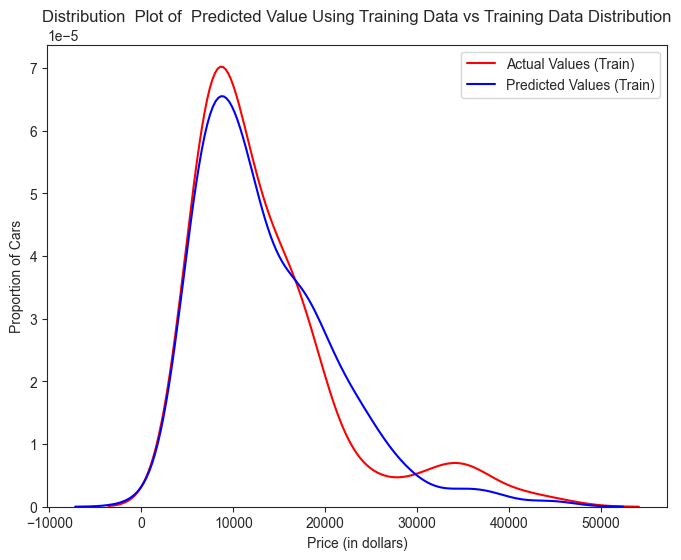

In [144]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

And the following is the distribution plot of the predicted values against the test values.

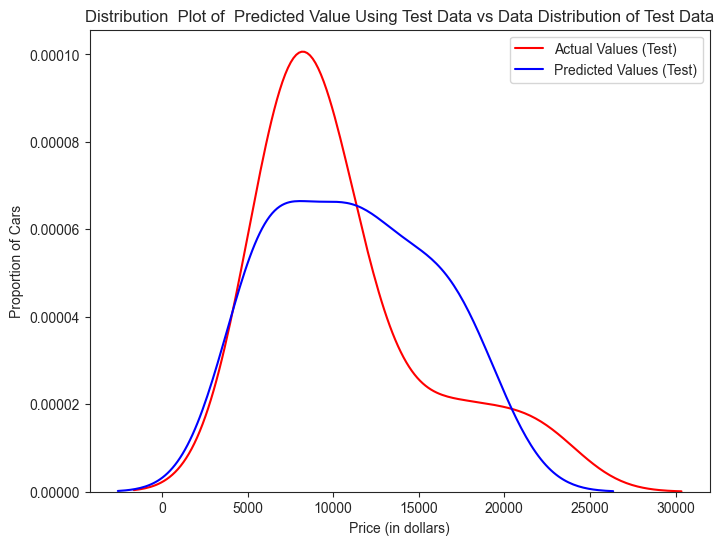

In [147]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing the above two figures, it is clear that the model lacks in the price range of 5000 to 15000 dollars. I shall try to improve upon that in the following sections. <br>
Now I shall create a linear regression with polynomial features including only horsepower as a predictor variable.

In [149]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Plotting the values predicted by the model against the training and test data:

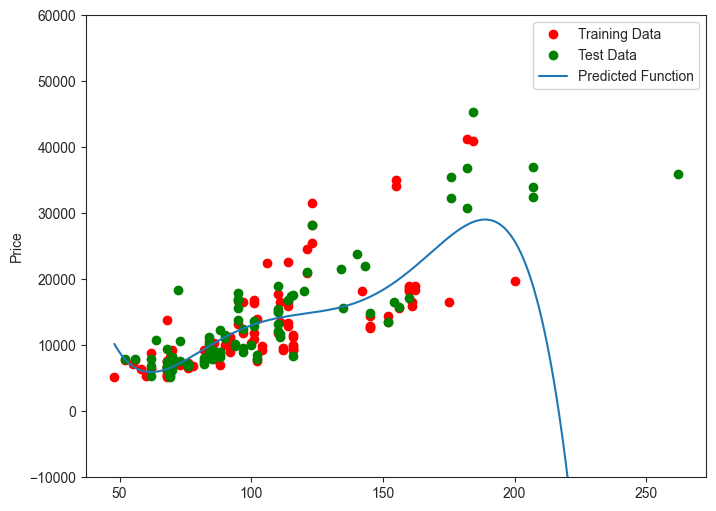

In [150]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

The function appears to track the data, but at around 200 horsepower, the function begins to diverge from the data points. This is a sign of overfitting. I shall attempt to resolve this by understanding which degree of polynomials gives the optimal results (highest $R^2$ value).

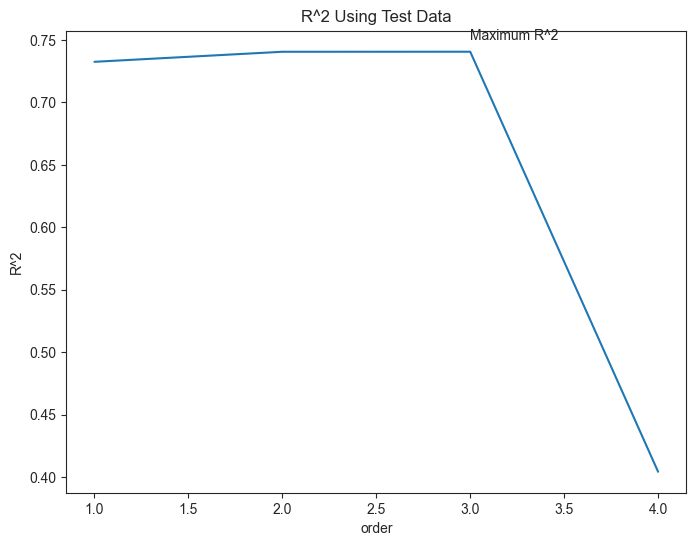

In [152]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    
plt.show()

The following widget allows you to experiment with different polynomial orders to fit the data and different test-train splits.

In [154]:
from ipywidgets import interact, interactive, fixed, interact_manual

def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)

interact(f, order=(0, 10, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=5, description='order', max=10), FloatSlider(value=0.45, description='te…

<function __main__.f(order, test_data)>

#### Multiple Linear Regression with Polynomial Features

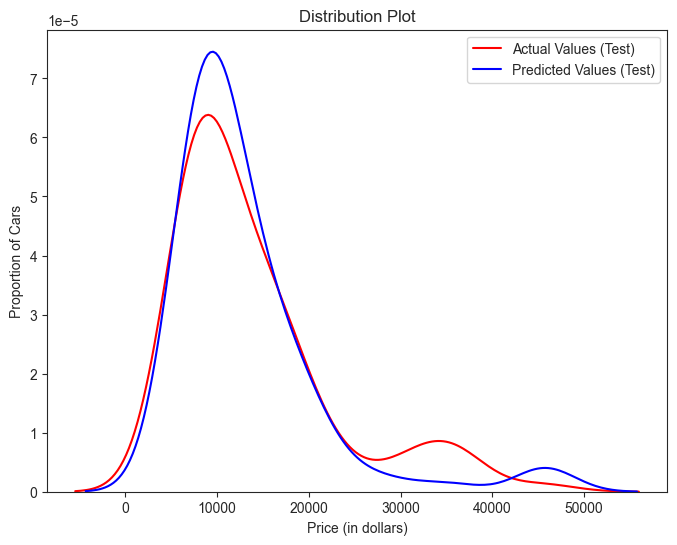

In [155]:
pr1 = PolynomialFeatures(degree=2)
columns_train = x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
columns_test = x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
x_train_pr1 = pr1.fit_transform(columns_train)
x_test_pr1 = pr1.fit_transform(columns_test)
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)
preds = poly1.predict(x_test_pr1)
DistributionPlot(y_test, preds, 'Actual Values (Test)', 'Predicted Values (Test)', 'Distribution Plot')

The above figure demonstrates that the multiple regression model with polynomial features is clearly performing better than the one without polynomial features.

## Ridge Regression

In [159]:
from sklearn.linear_model import Ridge
from tqdm import tqdm
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.546, Train Score=0.866]

100%|██████████| 1000/1000 [00:03<00:00, 279.83it/s, Test Score=0.564, Train Score=0.859]


We have successfully trained a ridge regression model on the same data as the previous models with the following features: `horsepower`, `curb-weight`, `engine-size`, `highway-mpg`,`normalized-losses`, `symboling`

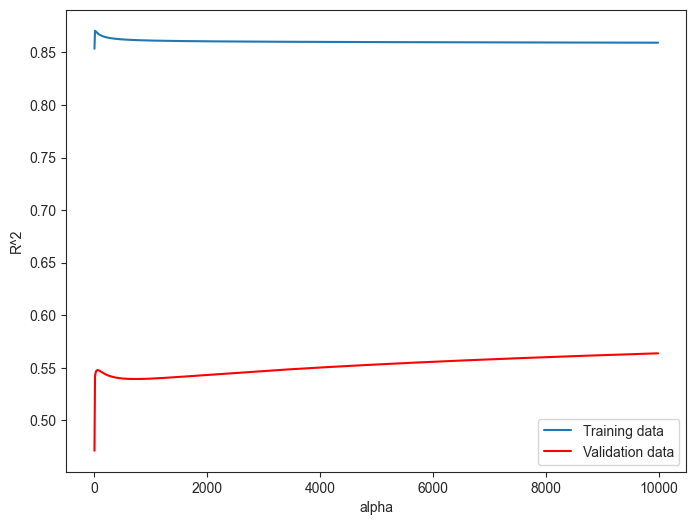

In [161]:
sns.lineplot(x=Alpha, y=Rsqu_train, label='Training data')
sns.lineplot(x=Alpha, y=Rsqu_test, color='r',label='Validation data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In the above figure, we can see that for the training data, as alpha increases the $R^2$ value decreases i.e. the model performs worse as alpha increases. <br>
For the validation data, the story is vice-versa, as alpha increases, $R^2$ increases and converges at a point. There is an optimal value for alpha at which $R^2$ value is maximum for testing data. Grid search comes in handy for finding this value.

# Grid Search

The term alpha is a hyperparameter. <b>GridSearchCV</b> can be used to make the process of finding the best hyperparameter simpler.

In [171]:
from sklearn.model_selection import GridSearchCV
parameters1 = [{'alpha': [(10**i) for i in range(-1, 6)]}]
RidgeModel = Ridge()
pr = PolynomialFeatures(degree=3)
x_data_pr = pr.fit_transform(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
Grid1 = GridSearchCV(RidgeModel, parameters1, cv=5)
Grid1.fit(x_data_pr, y_data)
BestRR = Grid1.best_estimator_
yhat = BestRR.predict(x_test_pr)
BestRR.score(x_test_pr, y_test)

0.9376433845014158

From the score, it is evident that the ridge regression model with grid search is the best model so far with an $R^2$ value of <b>93%</b>!. Below is the plot of predicted values against the test values.

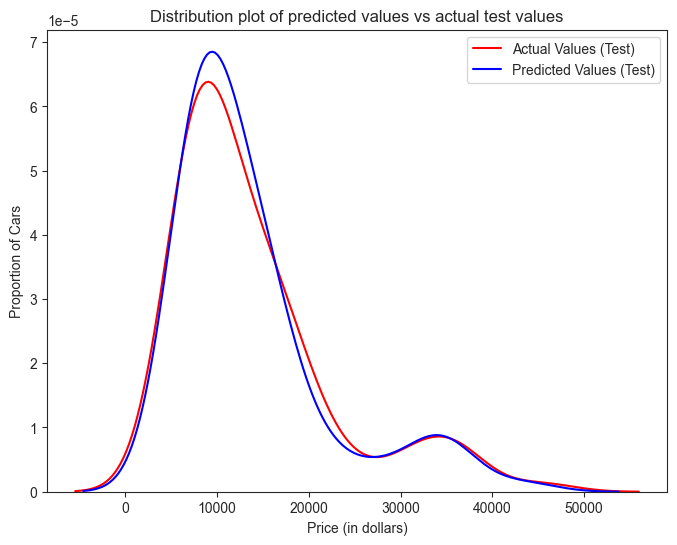

In [168]:
Title = "Distribution plot of predicted values vs actual test values"
DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)

We have successfully arrived at a good implementation of a model: Ridge Regression with multiple features and using Grid Search for hyperparameter alpha.